# IIC-2433 Minería de Datos UC

## Vamos a trabajar con un dataset de dígitos manuscritos

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

<Figure size 640x480 with 0 Axes>

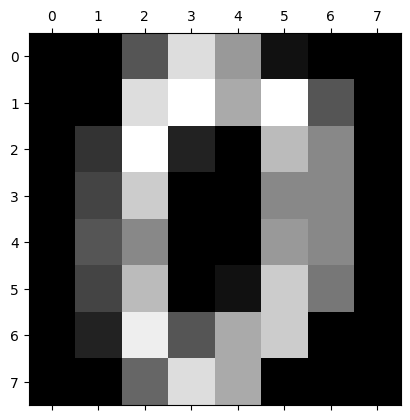

In [2]:
import matplotlib.pyplot as plt, numpy as np
plt.gray()
plt.matshow(digits.images[0])
plt.show()

## La variable objetivo indica cual es el dígito al que corresponde cada ejemplo

In [3]:
digits.target[:64]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3])

## Vamos a escalar los datos a [0,1]

In [4]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(digits.data)

## Y vamos a calcular las distancias entre todos los pares de dígitos, con Euclideana y coseno (se va a tardar unos minutos).

In [5]:
from scipy.spatial import distance

def euclidean_pairwise(X):
    n = X.shape[0]
    x = []
    for i in range(0,n-1):
        for j in range(i+1,n):
            dist = distance.euclidean(X[i,],X[j,])
            x.append(dist)
    
    return np.array(x)
            
def cosine_pairwise(X):
    n = X.shape[0]
    x = []
    for i in range(0,n-1):
        for j in range(i+1,n):
            dist = distance.cosine(X[i,],X[j,])
            x.append(dist)
    
    return np.array(x)

In [6]:
x_euc = euclidean_pairwise(X)
x_cos = cosine_pairwise(X)

## Vamos a ver como distribuyen las distancias con un histograma

In [7]:
def plot_hist(X, title):
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.85)
    plt.grid(axis='y')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))


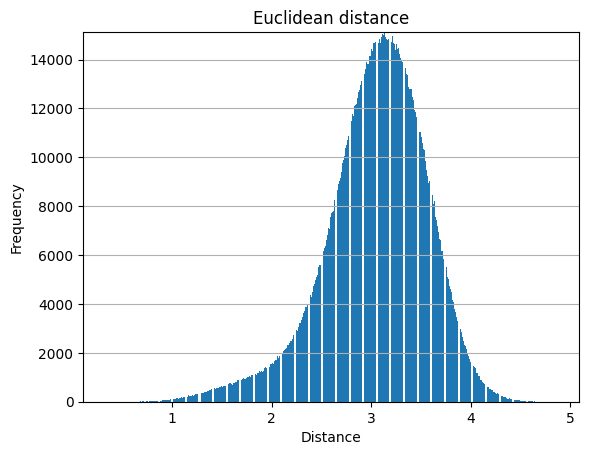

In [8]:
plot_hist(x_euc, 'Euclidean distance')

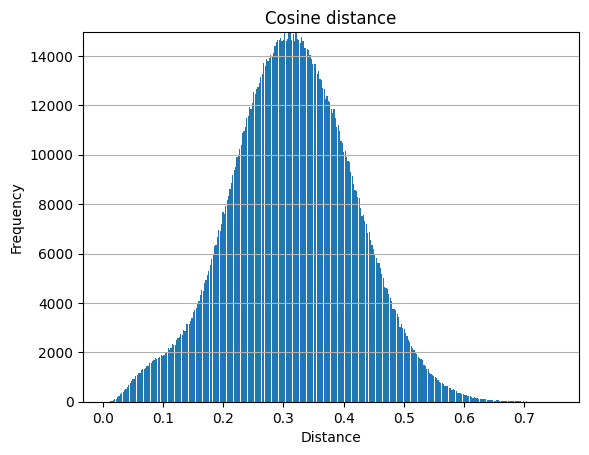

In [9]:
plot_hist(x_cos, 'Cosine distance')

## Ahora vamos a calcular un PCA a 30

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
pca.fit(X)

PCA(n_components=30)

Ver https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA para otras configuraciones

In [11]:
def plot_var_curve(X):
    plt.plot(X, lw=4)
    plt.grid(axis='y')
    plt.xlabel('Components')
    plt.ylabel('Variance')
    plt.title('Explained variance')
    

## Y vamos a ver la varianza capturada en cada componente

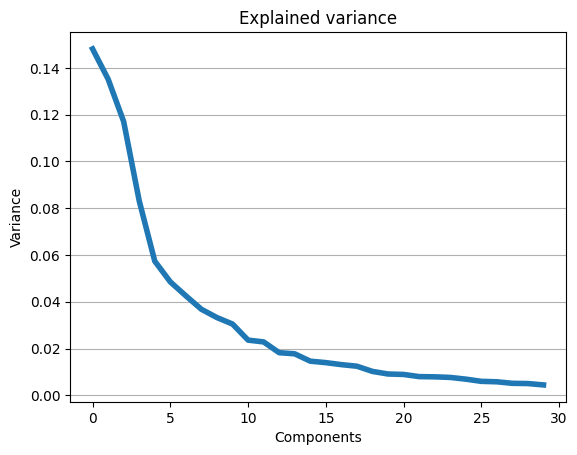

In [12]:
plot_var_curve(pca.explained_variance_ratio_)

## Voy a definir una función que me dice cuántas componentes PCA necesito para capturar una varianza dada

In [13]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i

## ¿Cuántas componentes necesito para capturar el 90% de la varianza del dataset?

In [14]:
min_var(0.9,pca.explained_variance_ratio_)

22

## Ahora, voy a descomponer el dataset con las 22 componentes

In [15]:
pca = PCA(n_components=22)
X_= pca.fit_transform(X)

## Y volveremos a calcular las distancias entre todos los pares, pero ahora sobre las componentes PCA

In [16]:
x_euc = euclidean_pairwise(X_)
x_cos = cosine_pairwise(X_)

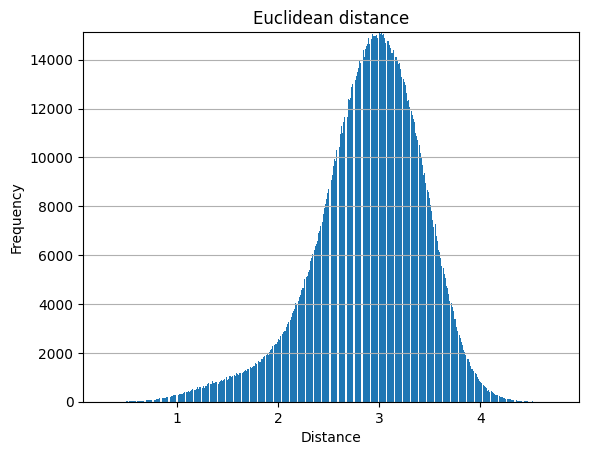

In [17]:
plot_hist(x_euc, 'Euclidean distance')

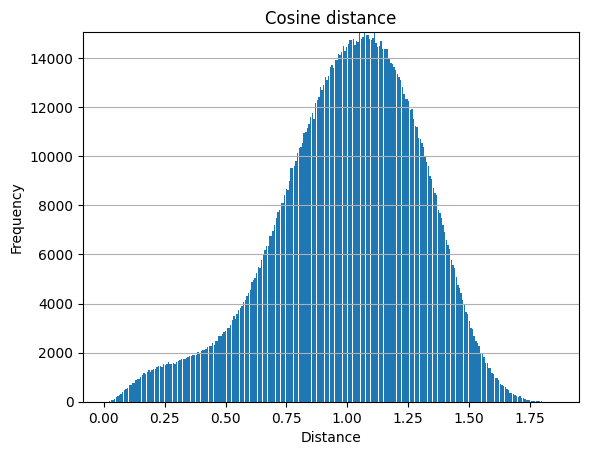

In [18]:
plot_hist(x_cos, 'Cosine distance')

## ¿Qué perdemos si capturamos muy poca varianza?

In [19]:
pca = PCA(n_components=1)
X_= pca.fit_transform(X)

In [20]:
x_euc = euclidean_pairwise(X_)
x_cos = cosine_pairwise(X_)

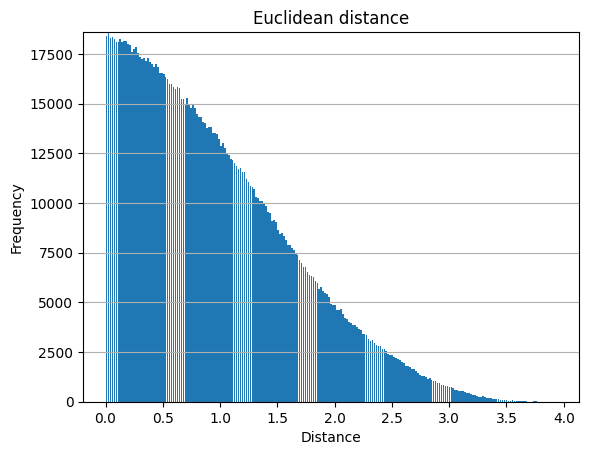

In [21]:
plot_hist(x_euc, 'Euclidean distance')

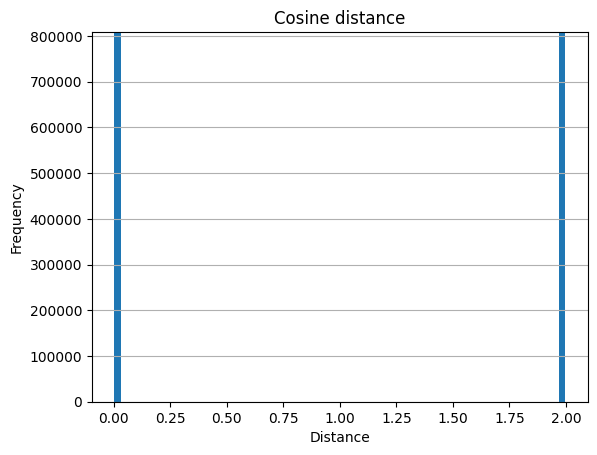

In [22]:
plot_hist(x_cos, 'Cosine distance')